# 6-6 Time Series

# Importing Libraries and loading Data

In [6]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [123]:
quandl.ApiConfig.api_key = 'dGbLvHnk9cvsVsfuzBm7'

In [9]:
path = r'C:\Users\tiffk\Chronic_Illness'

In [13]:
# Importing datasets
df_merged = pd.read_csv(os.path.join(path, 'Data', 'df_merged_cleaned.csv'), low_memory=False, index_col = False)

# Checking and preparing the data

In [17]:
df_merged.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,...,condition,weather,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change
0,0,0,0,9070,0,NaN,NaN,2015-11-26,1069,Condition,...,Ulcerative colitis,NaN,0.0,34,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,22737,32,male,US,2015-11-26,1069,Condition,...,Ulcerative colitis,NaN,0.0,32,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,376,2,female,CA,2017-04-28,3168,Condition,...,pain in left upper arm felt like i was getting...,NaN,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
3,3,2,2,376,2,female,CA,2017-04-28,3168,Condition,...,pain in left upper arm felt like i was getting...,NaN,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
4,4,2,2,376,2,female,CA,2017-04-28,3168,Condition,...,pain in left upper arm felt like i was getting...,NaN,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0


### Group time related variables month and year

In [23]:
#Group time related variables month and year
df_merged['checkin_date'] = pd.to_datetime(df_merged['checkin_date'])  # Convert 'checkin_date' to datetime if not already
df_merged['month'] = df_merged['checkin_date'].dt.month  # Create a new column 'month' with the month extracted from 'checkin_date'
df_merged['year'] = df_merged['checkin_date'].dt.year  # Create a new column 'year' with the year extracted from 'checkin_date'

### Once again drop unnecessary columns because I didn't export it last time

In [27]:
df_merged = df_merged.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [31]:
df_merged.head(5)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
0,9070,0,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,0,...,0.0,34,NaN,NaN,NaN,NaN,NaN,NaN,11,2015
1,22737,32,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,0,...,0.0,32,NaN,NaN,NaN,NaN,NaN,NaN,11,2015
2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
3,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
4,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017


# Create subsets of the data for certain types of conditions

In [37]:
# Grouping by trackable_name and counting occurrences
trackable_name_counts = df_merged['trackable_name'].value_counts()

# Selecting only those with counts greater than 10
trackable_name_counts_gt_10 = trackable_name_counts[trackable_name_counts > 10]

trackable_name_counts_gt_10

trackable_name
Stomach Pain                                                                                                           74626
Depression                                                                                                             74143
Anxiety                                                                                                                70487
Headache                                                                                                               69061
Nausea                                                                                                                 56281
                                                                                                                       ...  
just woke up                                                                                                              11
new cane                                                                                                      

In [40]:
# Subset for trackable_type = Condition and trackable_name containing the word 'pain' in any variation, including misspellings
condition_pain_subset = df_merged[(df_merged['trackable_type'] == 'Condition') & (df_merged['trackable_name'].str.contains(r'pain|pein|payn', case=False, regex=True))]

condition_pain_subset

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
3,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
4,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
5,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
6,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704940,4625,44,female,US,2017-02-21,245,Condition,Complex regional pain syndrome,3,1,...,3.0,44,0.0000,62.0,39.0,51.0,1025.0,12.0,2,2017
3704941,4625,44,female,US,2017-02-21,245,Condition,Complex regional pain syndrome,3,1,...,3.0,44,0.0000,62.0,39.0,51.0,1025.0,12.0,2,2017
3704942,4625,44,female,US,2017-02-21,245,Condition,Complex regional pain syndrome,3,1,...,3.0,44,0.0000,62.0,39.0,51.0,1025.0,12.0,2,2017
3704943,4625,44,female,US,2017-02-21,245,Condition,Complex regional pain syndrome,3,1,...,3.0,44,0.0000,62.0,39.0,51.0,1025.0,12.0,2,2017


In [44]:
# Subset for trackable_type = Symptom and trackable_name containing the word 'pain' in any variation
symptom_pain_subset = df_merged[(df_merged['trackable_type'] == 'Symptom') & (df_merged['trackable_name'].str.contains('pain', case=False))]

symptom_pain_subset

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
997,37880,31,female,US,2015-07-17,247,Symptom,ovarian pain,0,0,...,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,7,2015
998,37880,31,female,US,2015-07-17,247,Symptom,ovarian pain,0,0,...,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,7,2015
999,37880,31,female,US,2015-07-17,247,Symptom,ovarian pain,0,0,...,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,7,2015
1000,37880,31,female,US,2015-07-17,247,Symptom,ovarian pain,0,0,...,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,7,2015
1001,37880,31,female,US,2015-07-17,247,Symptom,ovarian pain,0,0,...,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729080,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3729081,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3729082,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3729083,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016


In [90]:
# Create subset df_mental
mental_conditions = ['Depression', 'Anxiety', 'Generalized anxiety disorder']
df_mental = df_merged[(df_merged['trackable_type'] == 'Condition') & (df_merged['trackable_name'].isin(mental_conditions))]

# Create subset df_physical
physical_conditions = ['Fibromyalgia', 'Chronic fatigue syndrome', 'Ehlers-Danlos syndrome', 'Migraine', 'Irritable bowel syndrome', 'IBS', 'EDS']
df_physical = df_merged[(df_merged['trackable_type'] == 'Condition') & (df_merged['trackable_name'].isin(physical_conditions))]

# Subset for trackable_type = Condition and trackable_name containing the word 'pain' in any variation, including misspellings
condition_pain_subset = df_merged[(df_merged['trackable_type'] == 'Condition') & (df_merged['trackable_name'].str.contains(r'pain|pein|payn', case=False, regex=True))]

# Subset for trackable_type = Condition and trackable_name containing the word 'pain' in any variation, including misspellings
arthritis_subset = df_merged[(df_merged['trackable_type'] == 'Condition') & (df_merged['trackable_name'].str.contains(r'arthritis|pein|payn', case=False, regex=True))]

# Subset for trackable_type = Condition and trackable_name containing the word 'pain' in any variation, including misspellings
asthma_subset = df_merged[(df_merged['trackable_type'] == 'Condition') & (df_merged['trackable_name'].str.contains(r'asthma', case=False, regex=True))]


In [68]:
df_mental.shape

(86530, 24)

In [42]:
condition_pain_subset.shape

(38807, 24)

In [48]:
symptom_pain_subset.shape

(469986, 24)

In [94]:
arthritis_subset.shape

(10349, 24)

In [92]:
asthma_subset.shape

(14217, 24)

In [52]:
condition_pain_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38807 entries, 2 to 3704944
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          38807 non-null  int64         
 1   age              38807 non-null  int64         
 2   sex              36799 non-null  object        
 3   country          36567 non-null  object        
 4   checkin_date     38807 non-null  datetime64[ns]
 5   trackable_id     38807 non-null  object        
 6   trackable_type   38807 non-null  object        
 7   trackable_name   38807 non-null  object        
 8   trackable_value  38807 non-null  object        
 9   has_arthritis    38807 non-null  int64         
 10  pain_count       38807 non-null  int64         
 11  symptom          37496 non-null  object        
 12  condition        38807 non-null  object        
 13  weather          0 non-null      object        
 14  severity         38807 non-null  float64 

In [54]:
#Create subset with common painful conditions related to joints, muscles, and inflammation
# List of terms related to pain, arthritis, inflammation, etc.
related_terms = ['pain', 'arthritis', 'inflammation', 'inflammatory', 'ache', 'achy', 'achiness', 'bursitis', 'costochondritis', 'stiffness', 'headache', 'stiff', 'joint', 'flare', 'hurt', 'hurting', 'soreness', 'aching', 'Arthralgia', 'Rheumatoid', 'Polyarthralgyia', 'joints', 'Sacroiliitis', 'fibromyalgia', 'spondyloarthropathy', 'Sciatica', 'Myalgic', 'Lupus', 'neuralgia', 'Costochondritis']

# Create a regular expression pattern to match the related terms
pattern = '|'.join(related_terms)

# Subset for entries related to the specified terms in 'trackable_name' or 'symptom' columns
pain_related_subset = df_merged[(df_merged['trackable_name'].str.contains(pattern, case=False, regex=True)) | (df_merged['symptom'].str.contains(pattern, case=False, regex=True))]

pain_related_subset

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
3,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
4,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
5,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
6,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729080,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3729081,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3729082,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3729083,29376,24,female,AU,2016-07-12,1,Symptom,Abdominal pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,7,2016


## Create a subset with the common pain conditions and related terms

In [56]:
# fix the duplicates issue
# List of terms related to pain, arthritis, inflammation, etc.
related_terms = ['pain', 'arthritis', 'inflammation', 'inflammatory', 'ache', 'achy', 'achiness', 'bursitis', 'costochondritis', 'stiffness', 'headache', 'stiff', 'joint', 'flare', 'hurt', 'hurting', 'soreness', 'aching', 'Arthralgia', 'Rheumatoid', 'Polyarthralgyia', 'joints', 'Sacroiliitis', 'fibromyalgia', 'spondyloarthropathy', 'Sciatica', 'Myalgic', 'Lupus', 'neuralgia', 'Costochondritis']

# Create a regular expression pattern to match the related terms
pattern = '|'.join(related_terms)

# Subset for entries related to the specified terms in 'trackable_name' or 'symptom' columns
related_subset = df_merged[(df_merged['trackable_name'].str.contains(pattern, case=False, regex=True)) | (df_merged['symptom'].str.contains(pattern, case=False, regex=True))]

# Remove duplicate rows based on 'trackable_name' and 'symptom' columns
related_subset = related_subset.drop_duplicates(subset=['trackable_name', 'symptom'])

related_subset

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
22,376,2,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3,0,...,3.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
42,376,2,female,CA,2017-04-28,3170,Condition,pain in hand joints,4,0,...,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
62,376,2,female,CA,2017-04-28,3171,Condition,numbness in right hand,2,0,...,2.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
82,376,2,female,CA,2017-04-28,1356,Condition,Headache,2,0,...,2.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716126,29376,24,female,AU,2016-06-29,243,Symptom,Stomach Pain,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,6,2016
3716164,29376,24,female,AU,2016-06-29,91,Symptom,Foot pain,2,0,...,2.0,24,NaN,NaN,NaN,NaN,NaN,NaN,6,2016
3716202,29376,24,female,AU,2016-06-29,98,Symptom,Headache,0,0,...,0.0,24,NaN,NaN,NaN,NaN,NaN,NaN,6,2016
3716278,29376,24,female,AU,2016-06-29,7,Symptom,Ankle pain,1,0,...,1.0,24,NaN,NaN,NaN,NaN,NaN,NaN,6,2016


In [182]:
# Remove duplicate rows based on 'trackable_name' and 'symptom' columns from asthma_subset 
asthma_subset = asthma_subset.drop_duplicates(subset=['trackable_name', 'symptom'])
asthma_subset

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
12422,40088,24,female,US,2015-05-29,80,Condition,Asthma,1,0,...,1.0,24,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
14072,6349,44,female,IE,2015-07-21,80,Condition,Asthma,1,0,...,1.0,44,NaN,NaN,NaN,NaN,NaN,NaN,7,2015
15825,20144,0,NaN,NaN,2015-05-26,80,Condition,Asthma,0,0,...,0.0,34,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
15966,20144,0,NaN,NaN,2015-05-25,80,Condition,Asthma,0,0,...,0.0,34,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
16257,10875,29,female,US,2015-05-25,80,Condition,Asthma,0,0,...,0.0,29,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468053,40448,39,male,AU,2016-07-18,80,Condition,Asthma,1,0,...,1.0,39,NaN,NaN,NaN,NaN,NaN,NaN,7,2016
3474272,63,0,doesnt_say,US,2016-08-02,80,Condition,Asthma,0,0,...,0.0,34,NaN,NaN,NaN,NaN,NaN,NaN,8,2016
3698572,17516,21,doesnt_say,US,2016-10-27,80,Condition,Asthma,0,0,...,0.0,21,NaN,NaN,NaN,NaN,NaN,NaN,10,2016
3707549,29376,24,female,AU,2016-06-24,80,Condition,Asthma,1,0,...,1.0,24,NaN,NaN,NaN,NaN,NaN,NaN,6,2016


In [ ]:
asthma_subset

In [178]:
# Remove duplicate rows based on 'trackable_name' and 'symptom' columns from arthritis_subset 
arthritis_subset = arthritis_subset.drop_duplicates(subset=['trackable_name', 'symptom'])
arthritis_subset

,user_id,age,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,pain_count,symptom,...,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
5080,27923,42,2016-04-07,886,Condition,Rheumatoid arthritis,1,1,0,injures,...,0.0,42,NaN,NaN,NaN,NaN,NaN,NaN,4,2016
5137,20522,33,2015-12-08,728,Condition,Osteoarthritis,2,1,2,Back pain,...,22.0,33,NaN,NaN,NaN,NaN,NaN,NaN,12,2015
9376,5843,46,2015-05-31,886,Condition,Rheumatoid arthritis,2,1,1,Fatigue,...,2.0,46,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
9424,12547,0,2015-05-31,886,Condition,Rheumatoid arthritis,2,1,2,Stomach Pain,...,22.0,34,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
10385,29642,34,2015-05-25,76,Condition,Arthritis,4,1,2,Pain,...,44.0,34,NaN,NaN,NaN,NaN,NaN,NaN,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469462,3877,33,2016-06-24,886,Condition,Rheumatoid arthritis,3,1,1,overdid it,...,3.0,33,NaN,NaN,NaN,NaN,NaN,NaN,6,2016
3660309,8432,25,2017-02-11,886,Condition,Rheumatoid arthritis,0,1,1,Skin sensitivity,...,0.0,25,NaN,NaN,NaN,NaN,NaN,NaN,2,2017
3677578,24043,29,2016-06-19,849,Condition,Psoriatic arthritis,1,1,1,Joint swelling,...,1.0,29,NaN,NaN,NaN,NaN,NaN,NaN,6,2016
3700598,18476,31,2016-07-04,569,Condition,Juvenile rheumatoid arthritis,3,1,1,NaN,...,3.0,31,NaN,NaN,NaN,NaN,NaN,NaN,7,2016


# Preparing Pain related Data and Plot count of pain related entries over time

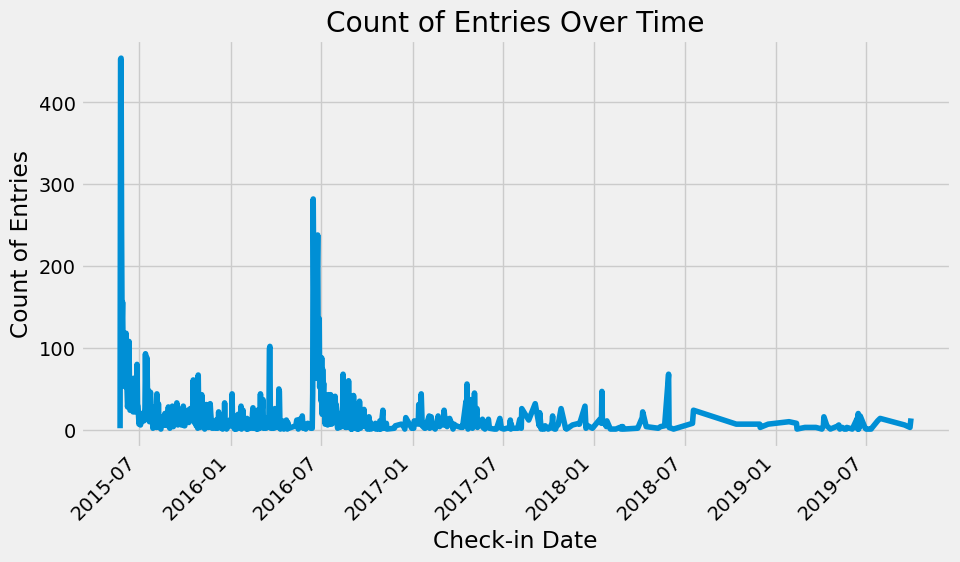

In [210]:
# Convert 'checkin_date' to datetime format
related_subset['checkin_date'] = pd.to_datetime(related_subset['checkin_date'])

# Group by 'checkin_date' and count the number of entries
count_by_date = related_subset.groupby('checkin_date').size()

# Create a line graph with 'checkin_date' as the time and count of entries on the y-axis
plt.figure(figsize=(10, 6))
count_by_date.plot(kind='line')
plt.title('Count of Entries Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Count of Entries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

checkin_date
2015-05-24       0.0
2015-05-25    4094.0
2015-05-26    3450.0
2015-05-27     875.0
2015-05-28     675.0
               ...  
2019-07-24      26.0
2019-07-29      44.0
2019-09-16      15.0
2019-09-27       8.0
2019-09-29      42.0
Name: severity, Length: 628, dtype: float64


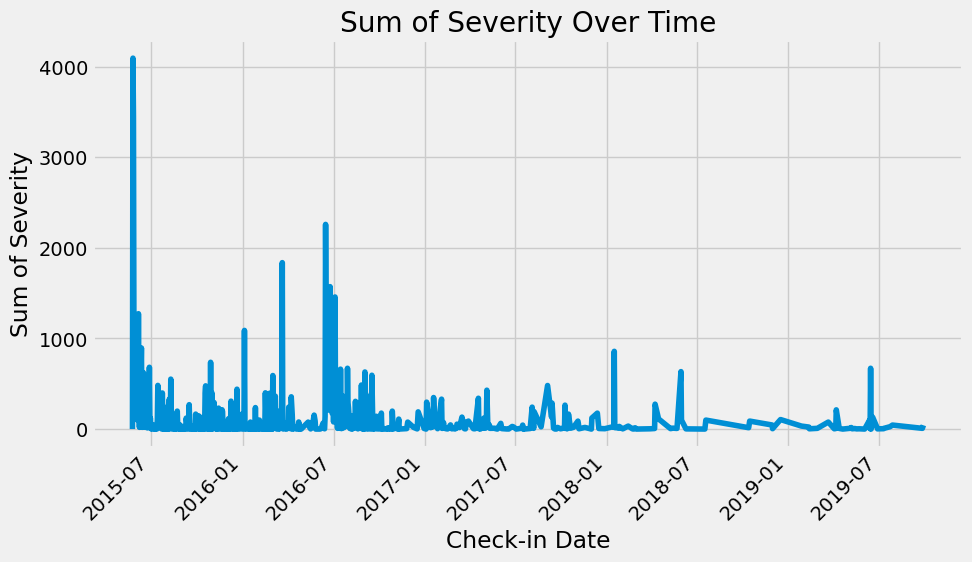

In [268]:
# Group by the DatetimeIndex and sum the severity
severity_by_date = filtered_dataframe['severity'].groupby(filtered_dataframe.index).sum()

# Display the table of data
print(severity_by_date)

# Create a line graph with 'checkin_date' as the time and sum of severity on the y-axis
plt.figure(figsize=(10, 6))
severity_by_date.plot(kind='line')
plt.title('Sum of Severity Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Sum of Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [266]:
filtered_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12187 entries, 2017-04-28 to 2016-06-29
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          12187 non-null  int64  
 1   age              12187 non-null  int64  
 2   sex              11207 non-null  object 
 3   country          11150 non-null  object 
 4   trackable_id     12187 non-null  object 
 5   trackable_type   12187 non-null  object 
 6   trackable_name   12187 non-null  object 
 7   trackable_value  8478 non-null   object 
 8   has_arthritis    12187 non-null  int64  
 9   pain_count       12187 non-null  int64  
 10  symptom          12108 non-null  object 
 11  condition        2151 non-null   object 
 12  weather          128 non-null    object 
 13  severity         12187 non-null  float64
 14  Age              12187 non-null  int64  
 15  precipitation    919 non-null    float64
 16  humidity         919 non-null    float64


checkin_date
2015-05-31       10953.0
2015-06-30        7510.0
2015-07-31        2784.0
2015-08-31        1860.0
2015-09-30         947.0
2015-10-31        3634.0
2015-11-30        1573.0
2015-12-31        1364.0
2016-01-31        1700.0
2016-02-29        1096.0
2016-03-31        3741.0
2016-04-30        1211.0
2016-05-31         548.0
2016-06-30       13035.0
2016-07-31      882802.0
2016-08-31        2337.0
2016-09-30        2499.0
2016-10-31         418.0
2016-11-30         248.0
2016-12-31         227.0
2017-01-31    20004081.0
2017-02-28         511.0
2017-03-31        1541.0
2017-04-30        1964.0
2017-05-31         675.0
2017-06-30         121.0
2017-07-31          68.0
2017-08-31         467.0
2017-09-30         943.0
2017-10-31         548.0
2017-11-30         164.0
2017-12-31         363.0
2018-01-31        2130.0
2018-02-28          67.0
2018-03-31           9.0
2018-04-30        1607.0
2018-05-31         755.0
2018-06-30           2.0
2018-07-31          99.0
2018-08-31  

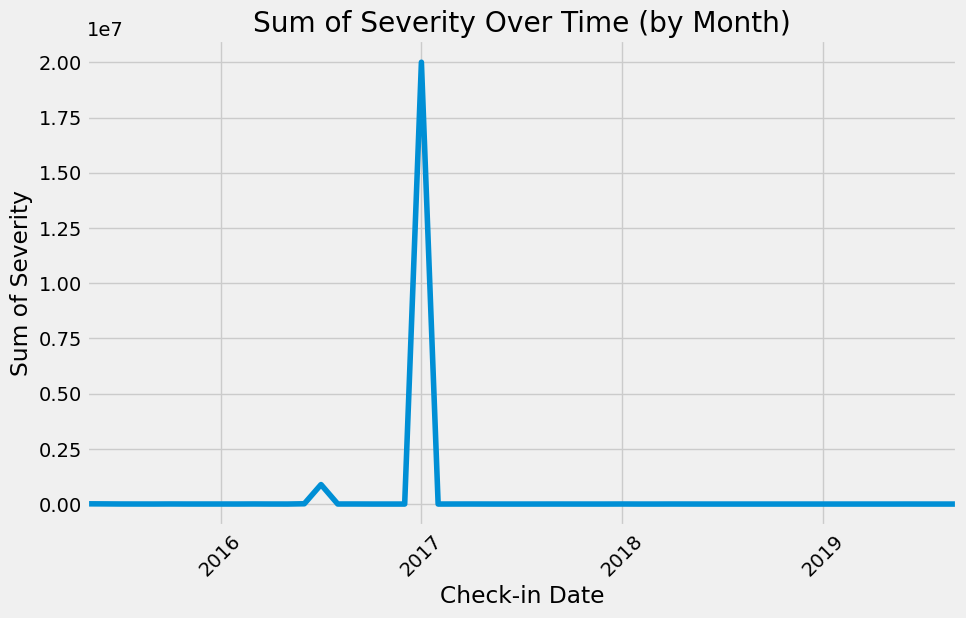

In [216]:
# Convert 'checkin_date' to datetime format
related_subset['checkin_date'] = pd.to_datetime(related_subset['checkin_date'])

# Set 'checkin_date' as the index
related_subset.set_index('checkin_date', inplace=True)

# Resample the data by month and sum the severity
severity_by_month = related_subset['severity'].resample('M').sum()

# Display the table of data
print(severity_by_month)

# Create a line graph with 'checkin_date' as the time and sum of severity on the y-axis
plt.figure(figsize=(10, 6))
severity_by_month.plot(kind='line')
plt.title('Sum of Severity Over Time (by Month)')
plt.xlabel('Check-in Date')
plt.ylabel('Sum of Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [234]:
related_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12209 entries, 2017-04-28 to 2016-06-29
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          12209 non-null  int64  
 1   age              12209 non-null  int64  
 2   sex              11229 non-null  object 
 3   country          11172 non-null  object 
 4   trackable_id     12209 non-null  object 
 5   trackable_type   12209 non-null  object 
 6   trackable_name   12209 non-null  object 
 7   trackable_value  8500 non-null   object 
 8   has_arthritis    12209 non-null  int64  
 9   pain_count       12209 non-null  int64  
 10  symptom          12130 non-null  object 
 11  condition        2151 non-null   object 
 12  weather          144 non-null    object 
 13  severity         12209 non-null  float64
 14  Age              12209 non-null  int64  
 15  precipitation    935 non-null    float64
 16  humidity         935 non-null    float64


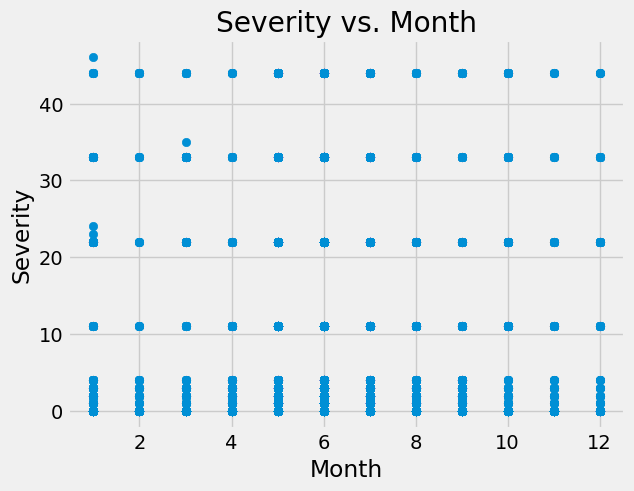

In [262]:
# scatter plot with severity outliers excluded

plt.scatter(filtered_dataframe['month'], filtered_dataframe['severity'])
plt.xlabel('Month')
plt.ylabel('Severity')
plt.title('Severity vs. Month')
plt.show()

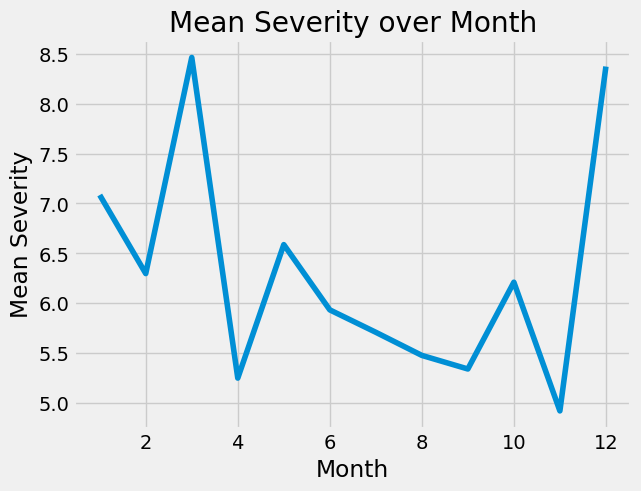

In [260]:
# plotting severity over the months excluding outliers

severity_monthly_avg = filtered_dataframe.groupby('month')['severity'].mean()
severity_monthly_avg.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Mean Severity')
plt.title('Mean Severity over Month')
plt.show()

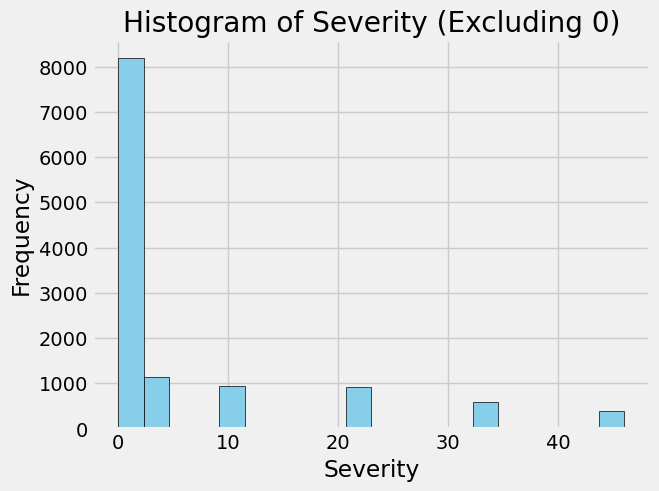

In [258]:

plt.hist(filtered_dataframe['severity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.title('Histogram of Severity (Excluding 0)')
plt.show()

In [252]:
severity_counts = related_subset['severity'].value_counts()
print(severity_counts)

severity
0.0           6433
11.0           948
22.0           923
2.0            896
1.0            857
3.0            700
33.0           594
4.0            436
44.0           396
1013.0           2
88.0             2
75.0             1
73.0             1
72.0             1
20002000.0       1
53.0             1
74.0             1
1031.0           1
46.0             1
23.0             1
375375.0         1
86.0             1
1023.0           1
51.0             1
35.0             1
500500.0         1
56.0             1
24.0             1
66.0             1
1012.0           1
69.0             1
54.0             1
77.0             1
Name: count, dtype: int64


In [256]:
severity_counts = filtered_dataframe['severity'].value_counts()
print(severity_counts)

severity
0.0     6433
11.0     948
22.0     923
2.0      896
1.0      857
3.0      700
33.0     594
4.0      436
44.0     396
24.0       1
35.0       1
23.0       1
46.0       1
Name: count, dtype: int64


In [254]:
# Create a new dataframe excluding values of severity greater than 50
filtered_dataframe = related_subset[related_subset['severity'] <= 50]

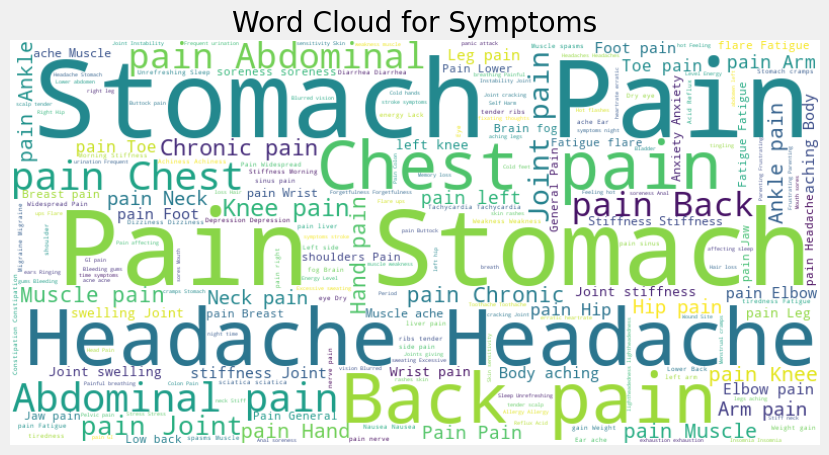

In [65]:
from wordcloud import WordCloud

# Combine all symptoms into a single string
symptoms_text = ' '.join(symptom for symptom in related_subset['symptom'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(symptoms_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Symptoms')
plt.show()

# Mental Data

## I've decided to wait to do the mental data so I can progress witht he other data 

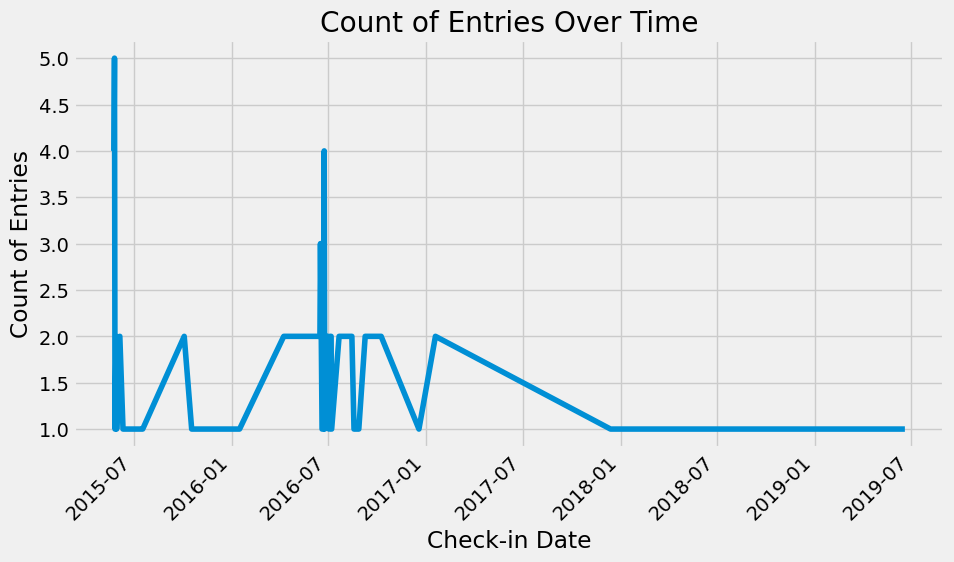

In [70]:
# Convert 'checkin_date' to datetime format
df_mental['checkin_date'] = pd.to_datetime(related_subset['checkin_date'])

# Group by 'checkin_date' and count the number of entries
count_by_date_m = df_mental.groupby('checkin_date').size()

# Create a line graph with 'checkin_date' as the time and count of entries on the y-axis
plt.figure(figsize=(10, 6))
count_by_date_m.plot(kind='line')
plt.title('Count of Entries Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Count of Entries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

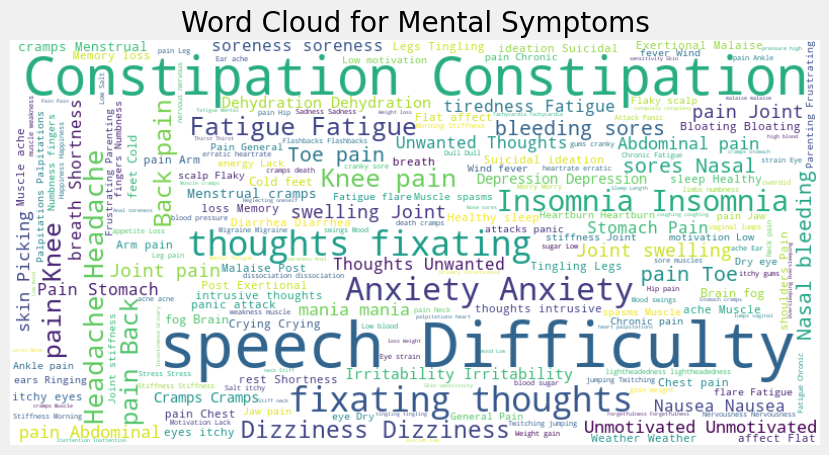

In [72]:
from wordcloud import WordCloud

# Combine all symptoms into a single string
symptoms_text = ' '.join(symptom for symptom in df_mental['symptom'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(symptoms_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Mental Symptoms')
plt.show()

# Asthma

## Checking for any periodical spikes in asthma

In [330]:
asthma_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2015-05-29 to 2016-06-29
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          90 non-null     int64  
 1   age              90 non-null     int64  
 2   sex              80 non-null     object 
 3   country          80 non-null     object 
 4   trackable_id     90 non-null     object 
 5   trackable_type   90 non-null     object 
 6   trackable_name   90 non-null     object 
 7   trackable_value  90 non-null     object 
 8   has_arthritis    90 non-null     int64  
 9   pain_count       90 non-null     int64  
 10  symptom          88 non-null     object 
 11  condition        90 non-null     object 
 12  weather          0 non-null      object 
 13  severity         90 non-null     float64
 14  Age              90 non-null     int64  
 15  precipitation    11 non-null     float64
 16  humidity         11 non-null     float64
 17

checkin_date
2015-05-31    26.0
2015-06-30     2.0
2015-07-31    34.0
2015-08-31     0.0
2015-09-30     0.0
2015-10-31     1.0
2015-11-30     0.0
2015-12-31     0.0
2016-01-31     1.0
2016-02-29     0.0
2016-03-31     0.0
2016-04-30     1.0
2016-05-31     0.0
2016-06-30    19.0
2016-07-31     9.0
2016-08-31    17.0
2016-09-30     5.0
2016-10-31     0.0
2016-11-30    22.0
2016-12-31     0.0
2017-01-31     0.0
2017-02-28     0.0
2017-03-31     1.0
2017-04-30     0.0
2017-05-31     1.0
2017-06-30     0.0
2017-07-31     0.0
2017-08-31     0.0
2017-09-30     0.0
2017-10-31     0.0
2017-11-30     0.0
2017-12-31     0.0
2018-01-31    16.0
2018-02-28     0.0
2018-03-31     0.0
2018-04-30     0.0
2018-05-31     0.0
Freq: M, Name: severity, dtype: float64


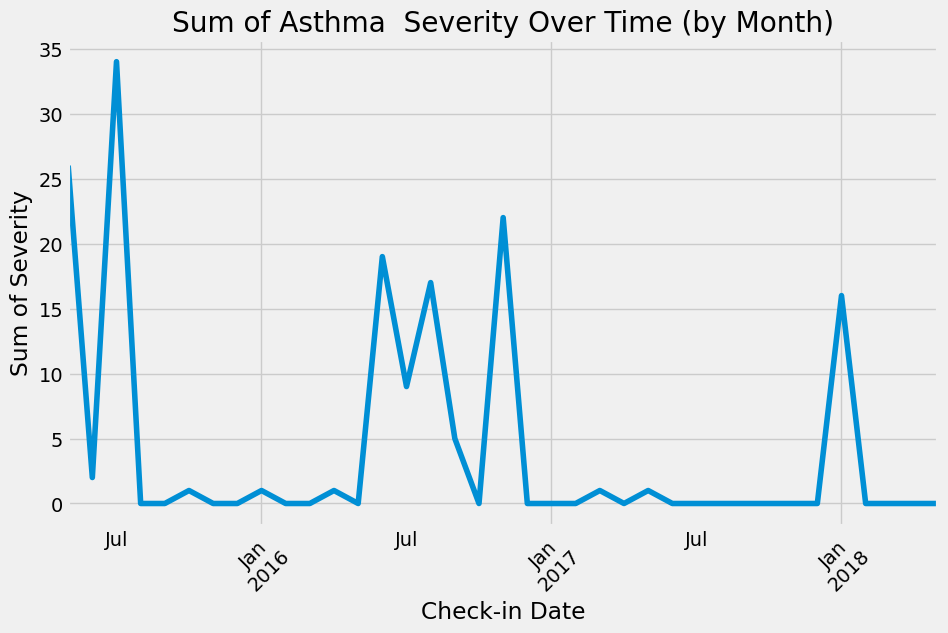

In [332]:
# Resample the data by month and sum the severity
asthma_severity_by_month = asthma_subset['severity'].resample('M').sum()

# Display the table of data
print(asthma_severity_by_month)

# Create a line graph with 'checkin_date' as the time and sum of severity on the y-axis
plt.figure(figsize=(10, 6))
asthma_severity_by_month.plot(kind='line')
plt.title('Sum of Asthma  Severity Over Time (by Month)')
plt.xlabel('Check-in Date')
plt.ylabel('Sum of Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

checkin_date
1     2.125000
3     0.500000
4     1.000000
5     1.928571
6     0.677419
7     2.687500
8     1.888889
9     2.500000
10    0.333333
11    7.333333
12    0.000000
Name: severity, dtype: float64


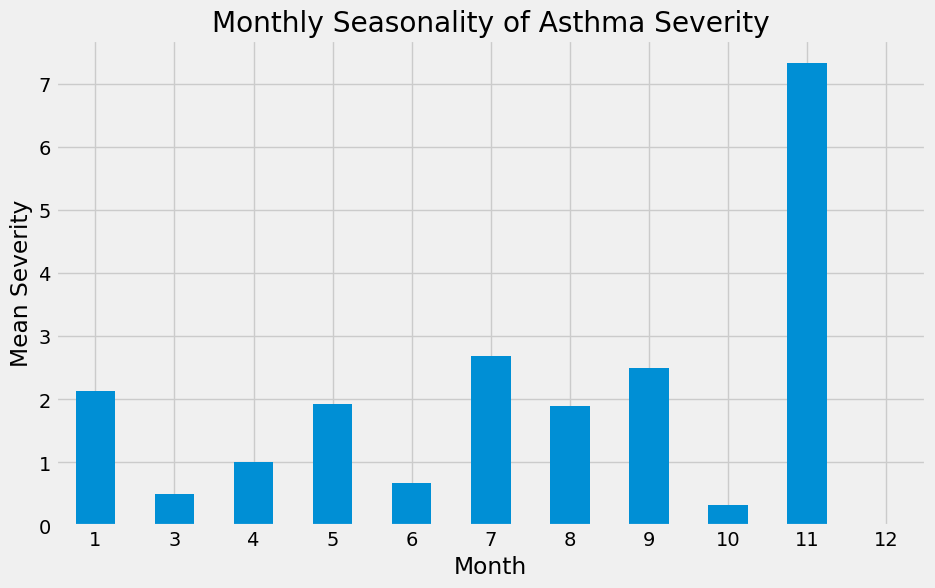

In [334]:
# Resample the data by month and sum the severity over all years
asthma_severity_monthly_seasonality = asthma_subset['severity'].groupby(asthma_subset.index.month).mean()

# Display the table of data
print(asthma_severity_monthly_seasonality)

# Create a bar graph to show the monthly seasonality
plt.figure(figsize=(10, 6))
asthma_severity_monthly_seasonality.plot(kind='bar')
plt.title('Monthly Seasonality of Asthma Severity')
plt.xlabel('Month')
plt.ylabel('Mean Severity')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

checkin_date
2015-05-31     2.166667
2015-06-30     0.333333
2015-07-31    11.333333
2015-08-31          NaN
2015-09-30          NaN
2015-10-31     0.500000
2015-11-30     0.000000
2015-12-31          NaN
2016-01-31     1.000000
2016-02-29          NaN
2016-03-31          NaN
2016-04-30     1.000000
2016-05-31          NaN
2016-06-30     0.760000
2016-07-31     0.750000
2016-08-31     1.888889
2016-09-30     2.500000
2016-10-31     0.000000
2016-11-30    11.000000
2016-12-31     0.000000
2017-01-31     0.000000
2017-02-28          NaN
2017-03-31     0.500000
2017-04-30          NaN
2017-05-31     1.000000
2017-06-30          NaN
2017-07-31     0.000000
2017-08-31          NaN
2017-09-30          NaN
2017-10-31          NaN
2017-11-30          NaN
2017-12-31          NaN
2018-01-31     3.200000
2018-02-28          NaN
2018-03-31          NaN
2018-04-30          NaN
2018-05-31     0.000000
Freq: M, Name: severity, dtype: float64


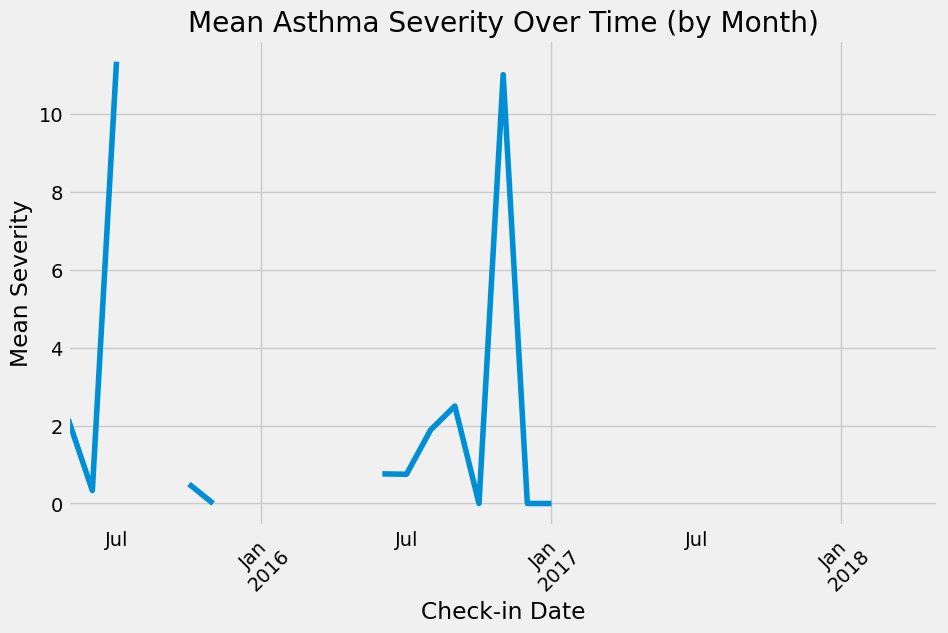

In [336]:
# Resample the data by month and calculate the mean severity
asthma_mean_severity_by_month = asthma_subset['severity'].resample('M').mean()

# Display the table of data
print(asthma_mean_severity_by_month)

# Create a line graph with 'checkin_date' as the time and mean severity on the y-axis
plt.figure(figsize=(10, 6))
asthma_mean_severity_by_month.plot(kind='line')
plt.title('Mean Asthma Severity Over Time (by Month)')
plt.xlabel('Check-in Date')
plt.ylabel('Mean Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [338]:
# Display the table of counts of severity values
severity_counts = asthma_subset['severity'].value_counts()
print(severity_counts)

severity
0.0     42
1.0     29
11.0     7
2.0      7
3.0      3
22.0     1
4.0      1
Name: count, dtype: int64


In [340]:
# Create a new filtered DataFrame
filtered_asthma_subset = asthma_subset.copy()  # Create a copy of the original DataFrame

# Limit the severity value to 11
filtered_asthma_subset['severity'] = filtered_asthma_subset['severity'].apply(lambda x: min(x, 11))

# Replace NaN values with the mean severity
mean_severity = filtered_asthma_subset['severity'].mean()
filtered_asthma_subset['severity'].fillna(mean_severity, inplace=True)

# Display the new filtered DataFrame
print(filtered_asthma_subset)

              user_id  age         sex country trackable_id trackable_type  \
checkin_date                                                                 
2015-05-29      40088   24      female      US           80      Condition   
2015-07-21       6349   44      female      IE           80      Condition   
2015-05-26      20144    0         NaN     NaN           80      Condition   
2015-05-25      20144    0         NaN     NaN           80      Condition   
2015-05-25      10875   29      female      US           80      Condition   
...               ...  ...         ...     ...          ...            ...   
2016-07-18      40448   39        male      AU           80      Condition   
2016-08-02         63    0  doesnt_say      US           80      Condition   
2016-10-27      17516   21  doesnt_say      US           80      Condition   
2016-06-24      29376   24      female      AU           80      Condition   
2016-06-29      29376   24      female      AU           80     

In [342]:
# Create a new DataFrame with only the DatetimeIndex and severity column
datetime_severity_df = asthma_subset[['severity']].copy()

# Display the new DataFrame
print(datetime_severity_df)

              severity
checkin_date          
2015-05-29         1.0
2015-07-21         1.0
2015-05-26         0.0
2015-05-25         0.0
2015-05-25         0.0
...                ...
2016-07-18         1.0
2016-08-02         0.0
2016-10-27         0.0
2016-06-24         1.0
2016-06-29         0.0

[90 rows x 1 columns]


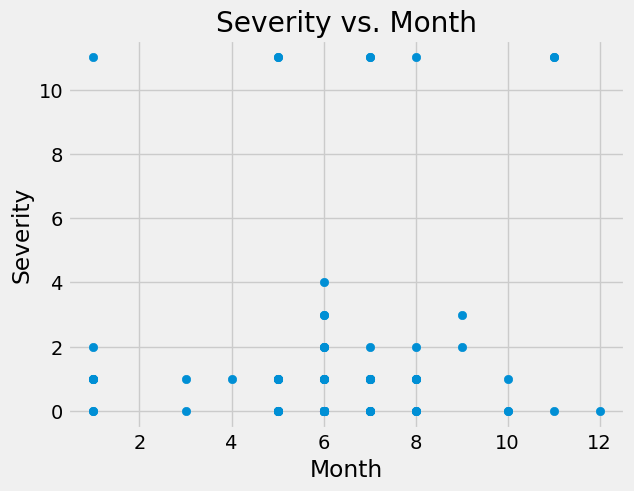

In [344]:
# scatter plot with severity outliers excluded

plt.scatter(filtered_asthma_subset['month'], filtered_asthma_subset['severity'])
plt.xlabel('Month')
plt.ylabel('Severity')
plt.title('Severity vs. Month')
plt.show()

In [346]:
M = 12  # Assuming M is the frequency parameter
decomposition = sm.tsa.seasonal_decompose(datetime_severity_df, model='additive', period=M)

In [348]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<Figure size 1000x600 with 0 Axes>

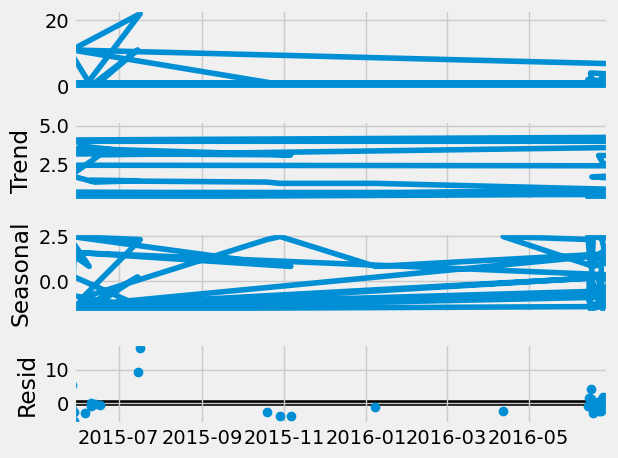

In [350]:
# For the assumption Asthma decomposition is the result of seasonal decomposition
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6
decomposition.plot()
plt.show()

**this looks like  mess!**

In [353]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(datetime_severity_df['severity'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.190366e+00
p-value                        6.143872e-08
Number of Lags Used            1.000000e+00
Number of Observations Used    8.800000e+01
Critical Value (1%)           -3.506944e+00
Critical Value (5%)           -2.894990e+00
Critical Value (10%)          -2.584615e+00
dtype: float64


**The p-value appears to be extremely significant. Overall, the results of the Dickey-Fuller test indicate that the time series for asthma is stationary, since the test statistic is sufficiently negative and the p-value is very small, so the null hypothesis of non-stationarity can be rejected for severity of asthma in Asthma subset**

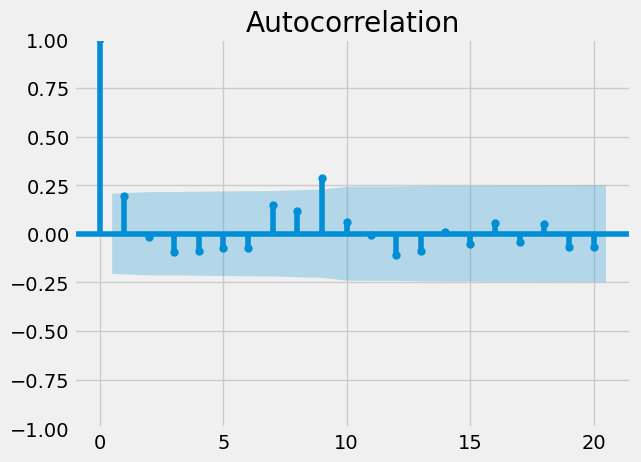

In [356]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(datetime_severity_df)
plt.show()

In [358]:
# saving to csv
filtered_asthma_subset.to_csv(os.path.join(path, 'Data', 'asthma_filtered_dataframe.csv'))

# Arthritis

## Rechecking for outliers and filtering arthritis data

checkin_date
2015-05-31    316.0
2015-06-30     27.0
2015-07-31     22.0
2015-08-31     26.0
2015-09-30      1.0
2015-10-31     47.0
2015-11-30      3.0
2015-12-31     22.0
2016-01-31      4.0
2016-02-29     66.0
2016-03-31      3.0
2016-04-30     29.0
2016-05-31     50.0
2016-06-30    220.0
2016-07-31     85.0
2016-08-31      4.0
2016-09-30     44.0
2016-10-31      0.0
2016-11-30      5.0
2016-12-31      1.0
2017-01-31     66.0
2017-02-28     25.0
2017-03-31      0.0
2017-04-30     25.0
2017-05-31      5.0
2017-06-30      0.0
2017-07-31      0.0
2017-08-31      0.0
2017-09-30     22.0
2017-10-31      3.0
2017-11-30      0.0
2017-12-31      0.0
2018-01-31     26.0
2018-02-28      0.0
2018-03-31      0.0
2018-04-30      0.0
2018-05-31      0.0
2018-06-30      0.0
2018-07-31      0.0
2018-08-31      0.0
2018-09-30      0.0
2018-10-31      0.0
2018-11-30      0.0
2018-12-31      0.0
2019-01-31      0.0
2019-02-28      0.0
2019-03-31     22.0
2019-04-30      0.0
2019-05-31      3.0
2019-06

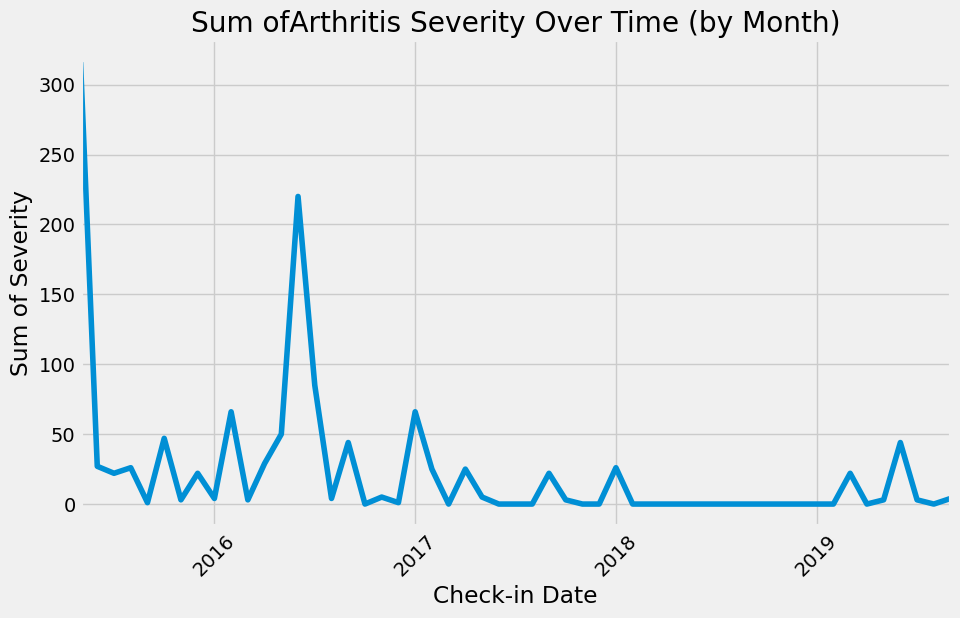

In [362]:
# Convert 'checkin_date' to datetime format
arthritis_subset['checkin_date'] = pd.to_datetime(arthritis_subset['checkin_date'])

# Set 'checkin_date' as the index
arthritis_subset.set_index('checkin_date', inplace=True)

# Resample the data by month and sum the severity
severity_by_month = arthritis_subset['severity'].resample('M').sum()

# Display the table of data
print(severity_by_month)

# Create a line graph with 'checkin_date' as the time and sum of severity on the y-axis
plt.figure(figsize=(10, 6))
severity_by_month.plot(kind='line')
plt.title('Sum ofArthritis Severity Over Time (by Month)')
plt.xlabel('Check-in Date')
plt.ylabel('Sum of Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [367]:
severity_counts_arth = arthritis_subset['severity'].value_counts()
print(severity_counts_arth)

severity
2.0     34
3.0     28
0.0     20
22.0    16
1.0     16
11.0    12
4.0      8
44.0     7
33.0     7
Name: count, dtype: int64


checkin_date
2015-05-31    316.0
2015-06-30     27.0
2015-07-31     22.0
2015-08-31     26.0
2015-09-30      1.0
2015-10-31     47.0
2015-11-30      3.0
2015-12-31     22.0
2016-01-31      4.0
2016-02-29     66.0
2016-03-31      3.0
2016-04-30     29.0
2016-05-31     50.0
2016-06-30    220.0
2016-07-31     85.0
2016-08-31      4.0
2016-09-30     44.0
2016-10-31      0.0
2016-11-30      5.0
2016-12-31      1.0
2017-01-31     66.0
2017-02-28     25.0
2017-03-31      0.0
2017-04-30     25.0
2017-05-31      5.0
2017-06-30      0.0
2017-07-31      0.0
2017-08-31      0.0
2017-09-30     22.0
2017-10-31      3.0
2017-11-30      0.0
2017-12-31      0.0
2018-01-31     26.0
2018-02-28      0.0
2018-03-31      0.0
2018-04-30      0.0
2018-05-31      0.0
2018-06-30      0.0
2018-07-31      0.0
2018-08-31      0.0
2018-09-30      0.0
2018-10-31      0.0
2018-11-30      0.0
2018-12-31      0.0
2019-01-31      0.0
2019-02-28      0.0
2019-03-31     22.0
2019-04-30      0.0
2019-05-31      3.0
2019-06

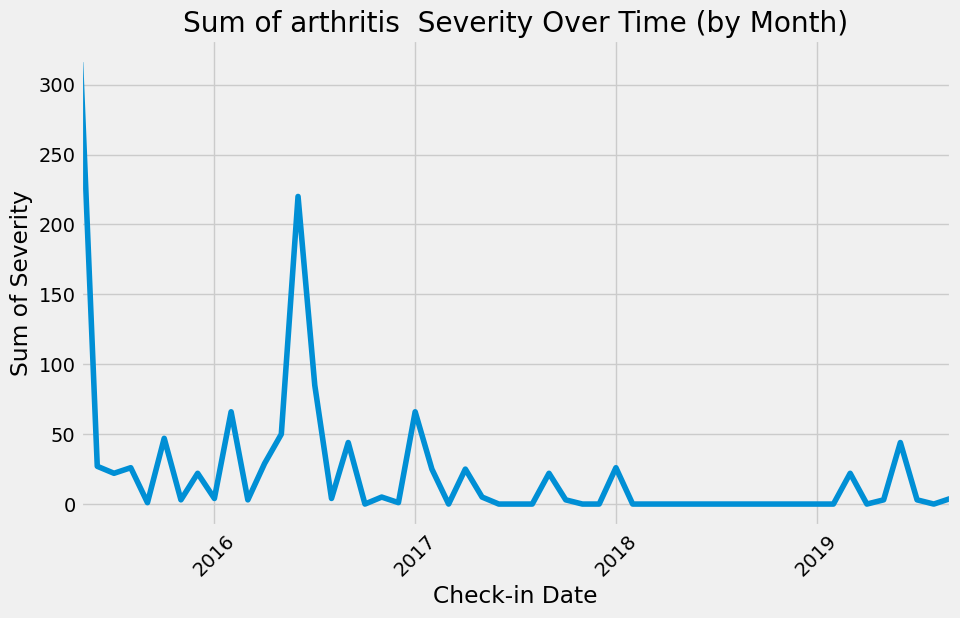

In [369]:
# Resample the data by month and sum the severity
arthritis_severity_by_month = arthritis_subset['severity'].resample('M').sum()

# Display the table of data
print(arthritis_severity_by_month)

# Create a line graph with 'checkin_date' as the time and sum of severity on the y-axis
plt.figure(figsize=(10, 6))
arthritis_severity_by_month.plot(kind='line')
plt.title('Sum of arthritis  Severity Over Time (by Month)')
plt.xlabel('Check-in Date')
plt.ylabel('Sum of Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [371]:
arthritis_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2016-04-07 to 2016-06-19
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          148 non-null    int64  
 1   age              148 non-null    int64  
 2   trackable_id     148 non-null    object 
 3   trackable_type   148 non-null    object 
 4   trackable_name   148 non-null    object 
 5   trackable_value  148 non-null    object 
 6   has_arthritis    148 non-null    int64  
 7   pain_count       148 non-null    int64  
 8   symptom          143 non-null    object 
 9   condition        148 non-null    object 
 10  weather          0 non-null      object 
 11  severity         148 non-null    float64
 12  Age              148 non-null    int64  
 13  precipitation    15 non-null     float64
 14  humidity         15 non-null     float64
 15  min_temp         15 non-null     float64
 16  max_temp         15 non-null     float64
 1

In [373]:
# Create a new DataFrame with only the DatetimeIndex and severity column
datetime_arth_severity_df = arthritis_subset[['severity']].copy()

# Display the new DataFrame
print(datetime_arth_severity_df)

              severity
checkin_date          
2016-04-07         0.0
2015-12-08        22.0
2015-05-31         2.0
2015-05-31        22.0
2015-05-25        44.0
...                ...
2016-06-24         3.0
2017-02-11         0.0
2016-06-19         1.0
2016-07-04         3.0
2016-06-19         4.0

[148 rows x 1 columns]


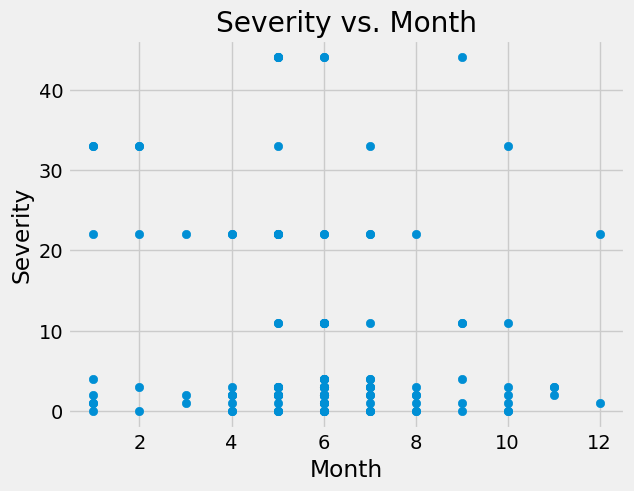

In [375]:
# scatter plot with severity outliers excluded

plt.scatter(arthritis_subset['month'], arthritis_subset['severity'])
plt.xlabel('Month')
plt.ylabel('Severity')
plt.title('Severity vs. Month')
plt.show()

## Checking for seasonality and stationarity of arthritis data

In [377]:
M = 12  # Assuming M is the frequency parameter
decomposition = sm.tsa.seasonal_decompose(datetime_arth_severity_df, model='additive', period=M)

In [380]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<Figure size 1000x600 with 0 Axes>

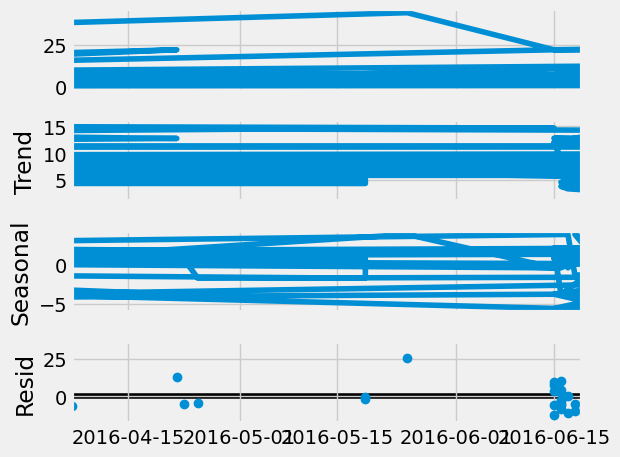

In [382]:
# For the assumption Arthritis decomposition is the result of seasonal decomposition
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6
decomposition.plot()
plt.show()

In [384]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(datetime_arth_severity_df['severity'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.131857e+01
p-value                        1.189665e-20
Number of Lags Used            0.000000e+00
Number of Observations Used    1.470000e+02
Critical Value (1%)           -3.475637e+00
Critical Value (5%)           -2.881410e+00
Critical Value (10%)          -2.577365e+00
dtype: float64


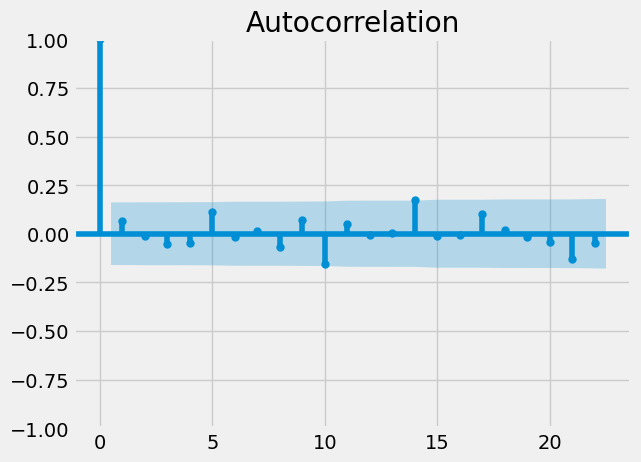

In [386]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(datetime_arth_severity_df)
plt.show()

# Severity in the pain related conditions

In [287]:
M = 12  # Assuming M is the frequency parameter
decomposition = sm.tsa.seasonal_decompose(severity_data, model='additive', period=M)

In [289]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<Figure size 5000x1000 with 0 Axes>

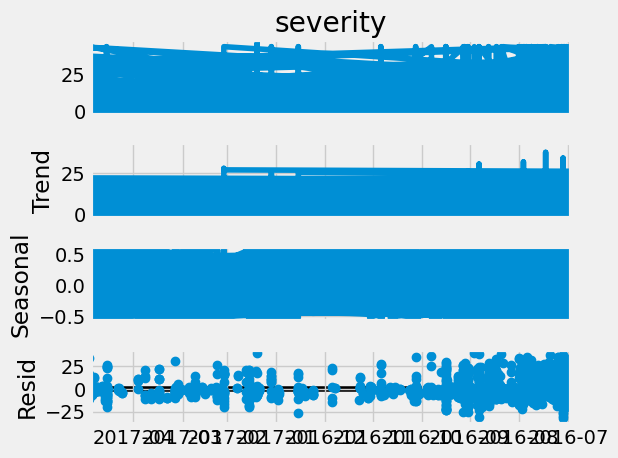

In [307]:
# Assuming decomposition is the result of seasonal decomposition
plt.figure(figsize=(50, 10))  # Set the figure size to 100x100
decomposition.plot()
plt.show()

In [291]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(filtered_dataframe['severity'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.605414e+01
p-value                        5.731824e-29
Number of Lags Used            2.600000e+01
Number of Observations Used    1.216000e+04
Critical Value (1%)           -3.430888e+00
Critical Value (5%)           -2.861778e+00
Critical Value (10%)          -2.566897e+00
dtype: float64


**The p-value appears to be extremely significant. Overall, the results of the Dickey-Fuller test indicate that the time series is stationary, since the test statistic is sufficiently negative and the p-value is very small, so the null hypothesis of non-stationarity can be rejected for severity of pain in pain conditions**

In [279]:
# Selecting just the 'severity' column and keeping the DatetimeIndex
severity_data = filtered_dataframe['severity']

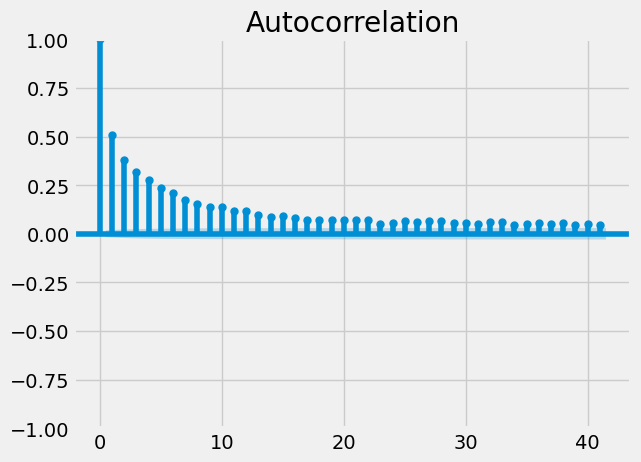

In [281]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(severity_data)
plt.show()

**This appears different than my other results examining autocorrelations. I'll examine this further**

In [316]:
# saving to csv
filtered_dataframe.to_csv(os.path.join(path, 'Data', 'pain_filtered_dataframe.csv'))

###### 

In [79]:
# Exporting df_mental and subsets 
df_mental.to_csv(os.path.join(path, 'Data', 'df_mental.csv'))

In [81]:
# Exporting pain_related_subset and subsets 
related_subset.to_csv(os.path.join(path, 'Data', 'pain_related_subset.csv'))

In [83]:
# Exporting df_merged_update and subsets 
df_merged.to_csv(os.path.join(path, 'Data', 'df_merged_update.csv'))

In [186]:
# Exporting asthma_subset and subsets 
asthma_subset.to_csv(os.path.join(path, 'Data', 'asthma_subset.csv'))

In [184]:
# Exporting arthritis_subset and subsets 
arthritis_subset.to_csv(os.path.join(path, 'Data', 'arthritis_subset.csv'))